# Programming Machine Learning Home Work Assignment1

In [1]:
# import all the necessary python packages for this task
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Enable inline plotting
%matplotlib inline
plt.style.use('ggplot')


<p>Load the data into Pandas</p>

In [2]:
#%pwd
fileName = r'../../data/adult-modified.csv'
df = pd.read_csv(fileName, sep=',')

# the first top 10 records
df.head(10)

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39,Public,13,Single,White,Male,40,<=50K
1,50,Self-emp,13,Married,White,Male,13,<=50K
2,38,Private,9,Single,White,Male,40,<=50K
3,53,Private,7,Married,Black,Male,40,<=50K
4,28,Private,13,Married,Black,Female,40,<=50K
5,37,Private,14,Married,White,Female,40,<=50K
6,49,Private,5,Married,Black,Female,16,<=50K
7,52,Self-emp,9,Married,White,Male,45,>50K
8,31,Private,14,Single,White,Female,50,>50K
9,42,Private,13,Married,White,Male,40,>50K


In [3]:
# the last 10 records of the data set
df.tail(10)


,age,workclass,education,marital-status,race,sex,hours-per-week,income
9402,18,Private,8,Single,White,Female,25,<=50K
9403,55,Public,10,Single,White,Male,40,<=50K
9404,44,Private,9,Single,Black,Female,40,<=50K
9405,38,Private,9,Married,White,Female,15,<=50K
9406,34,Self-emp,11,Married,White,Male,75,<=50K
9407,38,Private,10,Married,White,Male,60,>50K
9408,25,Private,9,Single,White,Female,8,<=50K
9409,21,Private,10,Single,Black,Male,40,<=50K
9410,38,Private,2,Married,White,Male,53,<=50K
9411,39,Private,10,Single,White,Female,40,<=50K


<p>Data Frame MetaData.</p>

In [4]:
df.columns

Index(['age', 'workclass', 'education', 'marital-status', 'race', 'sex',
       'hours-per-week', 'income'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9412 entries, 0 to 9411
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             9412 non-null   int64 
 1   workclass       9412 non-null   object
 2   education       9412 non-null   int64 
 3   marital-status  9412 non-null   object
 4   race            9412 non-null   object
 5   sex             9412 non-null   object
 6   hours-per-week  9412 non-null   int64 
 7   income          9412 non-null   object
dtypes: int64(3), object(5)
memory usage: 588.4+ KB


In [6]:
df.describe(include='all')

,age,workclass,education,marital-status,race,sex,hours-per-week,income
count,9412.000000,9412,9412.000000,9412,9412,9412,9412.000000,9412
unique,NaN,3,NaN,2,5,2,NaN,2
top,NaN,Private,NaN,Married,White,Male,NaN,<=50K
freq,NaN,6947,NaN,4737,8062,6383,NaN,7093
mean,38.357310,NaN,10.125266,NaN,NaN,NaN,41.080217,NaN
std,12.962135,NaN,2.542118,NaN,NaN,NaN,11.884590,NaN
min,17.000000,NaN,1.000000,NaN,NaN,NaN,1.000000,NaN
25%,28.000000,NaN,9.000000,NaN,NaN,NaN,40.000000,NaN
50%,37.000000,NaN,10.000000,NaN,NaN,NaN,40.000000,NaN
75%,47.000000,NaN,13.000000,NaN,NaN,NaN,45.000000,NaN


In [7]:
educationUniqueNos = df['education'].unique()
educationUniqueNos

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  1,  8,  2],
      dtype=int64)

In [8]:
df['workclass'].unique()

array(['Public', 'Self-emp', 'Private'], dtype=object)

In [9]:
# count the number of records for each category in a column
df['workclass'].value_counts()

Private     6947
Public      1317
Self-emp    1148
Name: workclass, dtype: int64

In [10]:
# count the number of records for each category in a column
df['marital-status'].value_counts()

Married    4737
Single     4675
Name: marital-status, dtype: int64

In [11]:
df['race'].unique()

array(['White', 'Black', 'Asian', 'Amer-Indian', 'Hispanic'], dtype=object)

In [12]:
# count the number of records for each category in a column
df['race'].value_counts()

White          8062
Black           892
Asian           291
Amer-Indian      92
Hispanic         75
Name: race, dtype: int64

In [13]:
df['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [14]:
# count the number of records for each category in a column
df['sex'].value_counts()

Male      6383
Female    3029
Name: sex, dtype: int64

In [15]:
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [16]:
# count the number of records for each category in a column
df['income'].value_counts()

<=50K    7093
>50K     2319
Name: income, dtype: int64

In [17]:
# the average age for male versus female
df[['sex','age']].groupby(['sex']).mean()

,age
sex,
Female,37.006273
Male,38.998433


In [18]:
# the average age for each race
df[['race','age']].groupby(['race']).mean()

,age
race,
Amer-Indian,36.934783
Asian,37.769759
Black,38.010090
Hispanic,33.733333
White,38.476185


In [19]:
# The number of workers in each workclass
df.groupby(['workclass'])['workclass'].count()

workclass
Private     6947
Public      1317
Self-emp    1148
Name: workclass, dtype: int64

In [20]:
# value_counts() method used to derive the number of workers in each workclass
df['workclass'].value_counts()

Private     6947
Public      1317
Self-emp    1148
Name: workclass, dtype: int64

In [21]:
# the average age for marital status
df[['marital-status', 'age']].groupby(['marital-status']).mean()

,age
marital-status,
Married,43.265358
Single,33.384171


## Box plots for the three numerical attributes

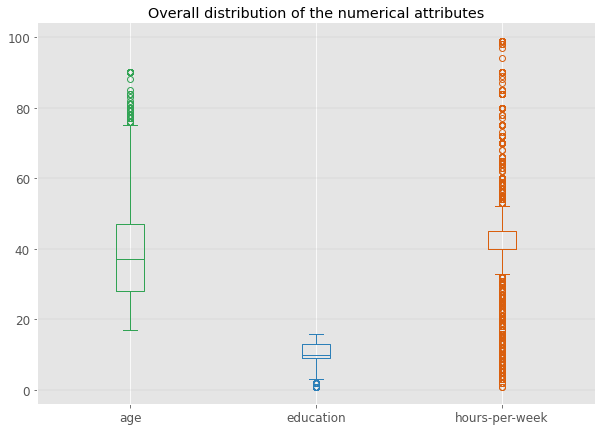

In [22]:

fig, bp = plt.subplots(figsize=(10,7))

bp.tick_params(labelsize=12)

# set title of the plot
bp.set_title('Overall distribution of the numerical attributes')
# Remove the top border
bp.spines['top'].set_visible(False);

# Add major gridlines, which are not so visble in the y-axis
bp.grid(color='grey', axis='y', linestyle='-', linewidth=0.2, alpha=0.5);

# assign the color for each distribution
colors = ['#31a354', '#2c7fb8', '#d95f0e']
age_color = dict(color=colors[0])
education_color = dict(color=colors[1])
hrsPerWk_color = dict(color=colors[2])
#print(hrsPerWk_color)


# Apply different properties to each distribution

bp.boxplot(df['age'], positions = [1], labels=['age'],
boxprops=age_color, medianprops=age_color,
whiskerprops=age_color,capprops=age_color, flierprops=dict(markeredgecolor=colors[0]));

bp.boxplot(df['education'], positions = [2], labels=['education'],
boxprops=education_color, medianprops=education_color,
whiskerprops=education_color,capprops=education_color, flierprops=dict(markeredgecolor=colors[1]));

bp.boxplot(df['hours-per-week'], positions = [3], labels=['hours-per-week'],
boxprops=hrsPerWk_color, medianprops=hrsPerWk_color,
whiskerprops=hrsPerWk_color,capprops=hrsPerWk_color, flierprops=dict(markeredgecolor=colors[2]));
plt.show();

## Histograms for the three numerical variables

<p>Using <a href="https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule"><strong>Freedma-Diaconis </strong></a>rule to calculate the number of bins where h = (2 * IQR)/n^(-1/3) implying that number of bins = (max - min)/h</p> 

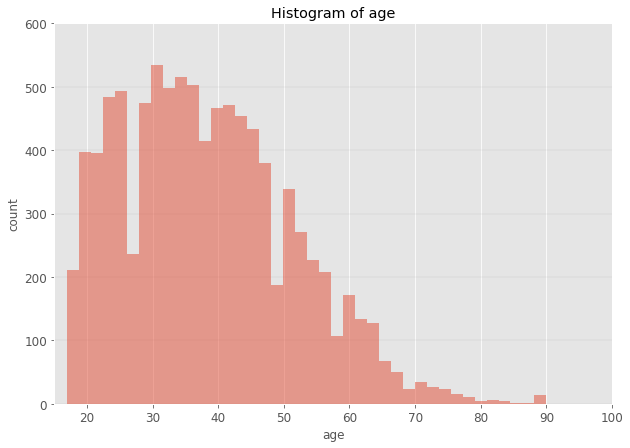

In [23]:
hs = plt.subplots(figsize=(10,7))
plt.hist(df['age'], bins = 40, alpha = 0.5)
plt.xlabel('age')
plt.ylabel('count')
plt.title('Histogram of age')
plt.axis([15, 100,  0, 600])
plt.grid(color='grey', axis='y', linestyle='-', linewidth=0.2, alpha=0.5)
plt.tick_params(labelsize=12)

(array([211., 397., 395., 484., 256., 473., 474., 535., 498., 257., 500.,
        674., 467., 248., 456., 421., 463., 338., 161., 314., 247., 217.,
        105., 203., 156., 123.,  94.,  31.,  50.,  44.,  23.,  17.,  23.,
         16.,  11.,   9.,   1.,   4.,   1.,   1.,  14.]),
 array([17.        , 18.7804878 , 20.56097561, 22.34146341, 24.12195122,
        25.90243902, 27.68292683, 29.46341463, 31.24390244, 33.02439024,
        34.80487805, 36.58536585, 38.36585366, 40.14634146, 41.92682927,
        43.70731707, 45.48780488, 47.26829268, 49.04878049, 50.82926829,
        52.6097561 , 54.3902439 , 56.17073171, 57.95121951, 59.73170732,
        61.51219512, 63.29268293, 65.07317073, 66.85365854, 68.63414634,
        70.41463415, 72.19512195, 73.97560976, 75.75609756, 77.53658537,
        79.31707317, 81.09756098, 82.87804878, 84.65853659, 86.43902439,
        88.2195122 , 90.        ]),
 <BarContainer object of 41 artists>)

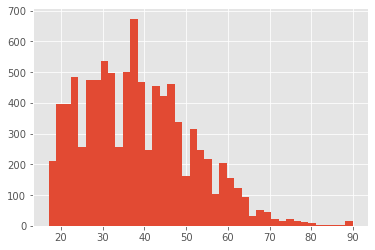

In [24]:
# Result validation
ageV = df['age']
a = np.array(ageV)
plt.hist(a, bins='auto')

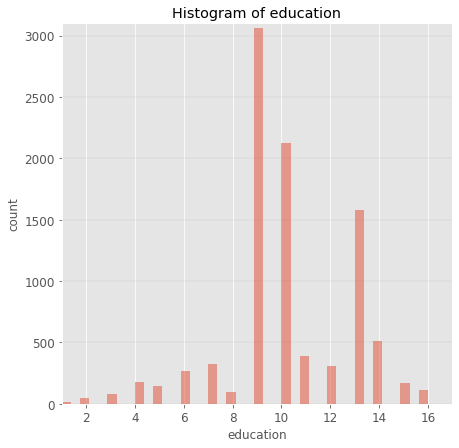

In [25]:
# histogram for education
hs = plt.subplots(figsize=(7,7))
plt.hist(df['education'], bins = 40, alpha = 0.5)
plt.xlabel('education')
plt.ylabel('count')
plt.title('Histogram of education')
plt.axis([1, 17,  0, 3100])
plt.grid(color='grey', axis='y', linestyle='-', linewidth=0.2, alpha=0.5)
plt.tick_params(labelsize=12)

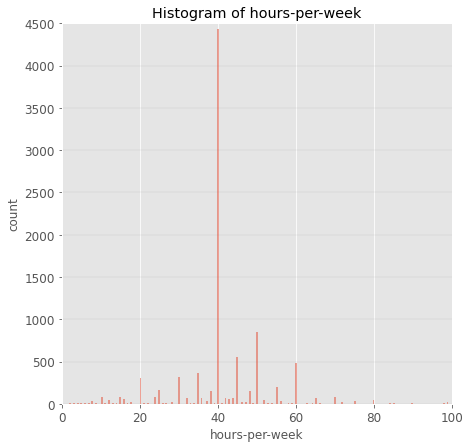

In [26]:
# histogram for hours-per-week
hs = plt.subplots(figsize=(7,7))
plt.hist(df['hours-per-week'], bins = 207, alpha = 0.5)
plt.xlabel('hours-per-week')
plt.ylabel('count')
plt.title('Histogram of hours-per-week')
plt.axis([0, 100,  0, 4500])
plt.grid(color='grey', axis='y', linestyle='-', linewidth=0.2, alpha=0.5)
plt.tick_params(labelsize=12)

## Scatter plots

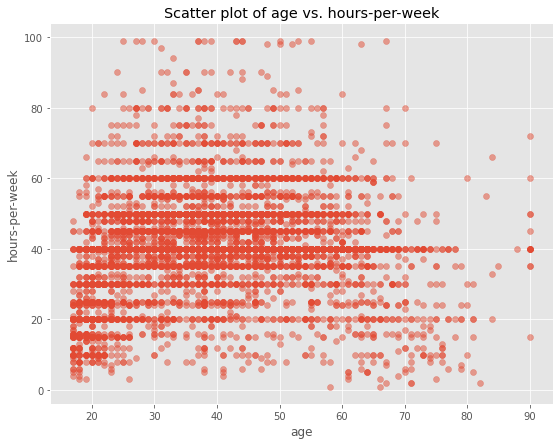

In [27]:
# Scatter plot of age (x-axis) vs. hours-per-week (y-axis)
fig, ax = plt.subplots(figsize=(9, 7))
ax.scatter(x = df['age'], y = df['hours-per-week'], alpha = 0.5)
plt.title('Scatter plot of age vs. hours-per-week')
plt.xlabel('age')
plt.ylabel('hours-per-week')
plt.show();



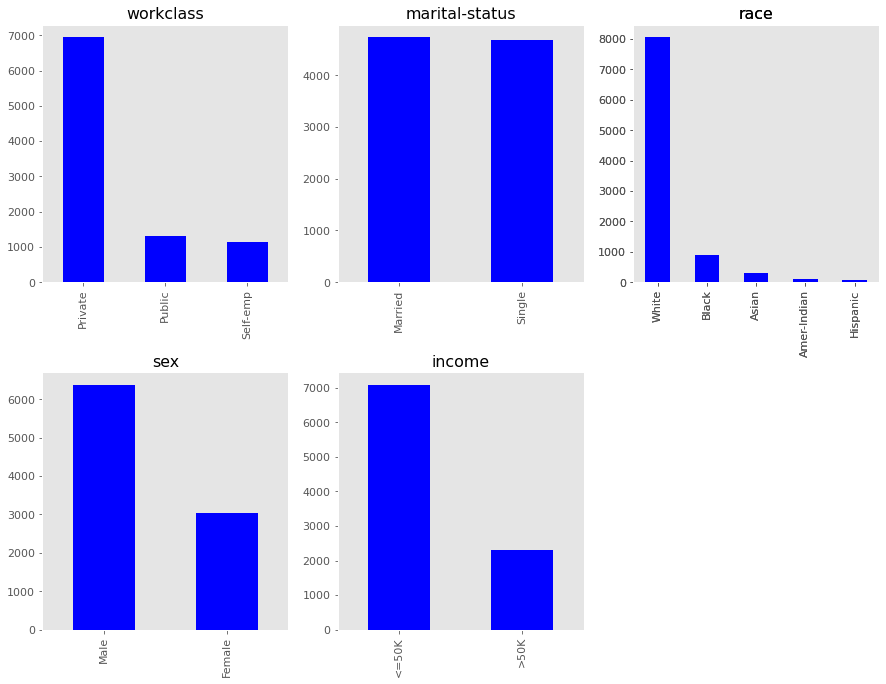

In [28]:
fig = plt.figure(figsize=(15, 5)) # set the size of the container

plt.rcParams.update({'font.size': 11}) # set the font size, this must be set at the top.
#fig.tight_layout(pad = 1.0)
fig.subplots_adjust(bottom = -0.8, wspace = 0.2, hspace = 0.35) # add space between each row of the subplots

ax1 = fig.add_subplot(2, 3, 1)
#ax1.set_xlabel('workclass')
ax1.set_title('workclass')
df['workclass'].value_counts().plot(kind = 'bar', grid = False, color=['blue']);

ax1 = fig.add_subplot(2, 3, 2)
#ax1.set_xlabel('marital-status')
ax1.set_title('marital-status')
df['marital-status'].value_counts().plot(kind = 'bar', grid = False, color=['blue']);

ax1 = fig.add_subplot(2, 3, 3)
#ax1.set_xlabel('race')
ax1.set_title('race')
df['race'].value_counts().plot(kind = 'bar', grid = False, color=['blue']);

ax1 = fig.add_subplot(2, 3, 3)
#ax1.set_xlabel('race')
ax1.set_title('race')
df['race'].value_counts().plot(kind = 'bar', grid = False, color=['blue']);

ax1 = fig.add_subplot(2, 3, 4)
ax1.set_title('sex')
df['sex'].value_counts().plot(kind = 'bar', grid = False, color=['blue']);

ax1 = fig.add_subplot(2, 3, 5)
ax1.set_title('income')
df['income'].value_counts().plot(kind = 'bar', grid = False, color=['blue']);
plt.show()


<p>The bar chats above show the distribution of the categorical frequencies in our data set.
In the work class bar chart, Private class has the highest number of frequency  when compared with the public and self-emp classes. </p>
<p>The number of married people is greater the number of single in the marital-status bar chart.</p> 
<p>The white race dominates the work force, followed by the black race in the race bar chart. According to our data, the Hispanic and Amer-Indian are the least minorities in the work force.</p> 
<p>Comparing the males and females, the males out number the females in the work force, and this would encourage the community to promote the girl child education.</p>
<p> Looking at the income there are a lot more people who make less than 50K when compared to those who make greater than 50K.
</p>

## Cross-Tabulations


In [29]:
# using the groupby() and count for cross tabulation
# cross tabulation of workclass vs. income
ct_df = df.groupby(['workclass', 'income'])['income'].count()
ct_df

workclass  income
Private    <=50K     5443
           >50K      1504
Public     <=50K      925
           >50K       392
Self-emp   <=50K      725
           >50K       423
Name: income, dtype: int64

In [30]:
# using the crosstab function
ctO = pd.crosstab(df['workclass'], df['income'])
ctO

income,<=50K,>50K
workclass,,
Private,5443,1504
Public,925,392
Self-emp,725,423


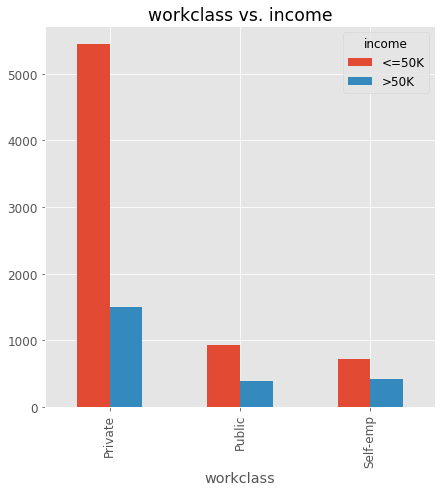

In [31]:
# graph the cross-tabulation of workclass with income
plt.rcParams.update({'font.size': 12}) # set the font size, this must be set at the top.
plt.show(ctO.plot(kind = 'bar', figsize = (7, 7), title = 'workclass vs. income'))


In [32]:
# cross tabulation of race vs. income
ct_RI = df.groupby(['race', 'income'])['income'].count()
ct_RI

race         income
Amer-Indian  <=50K       83
             >50K         9
Asian        <=50K      224
             >50K        67
Black        <=50K      773
             >50K       119
Hispanic     <=50K       69
             >50K         6
White        <=50K     5944
             >50K      2118
Name: income, dtype: int64

In [33]:
# or using the crosstab function from pandas data frame
ct_RIp = pd.crosstab(df['race'], df['income'])
ct_RIs = ct_RIp.sort_values('>50K', ascending=False) # Sort the data frame by '>50K' in descending order.
ct_RIs


income,<=50K,>50K
race,,
White,5944,2118
Black,773,119
Asian,224,67
Amer-Indian,83,9
Hispanic,69,6


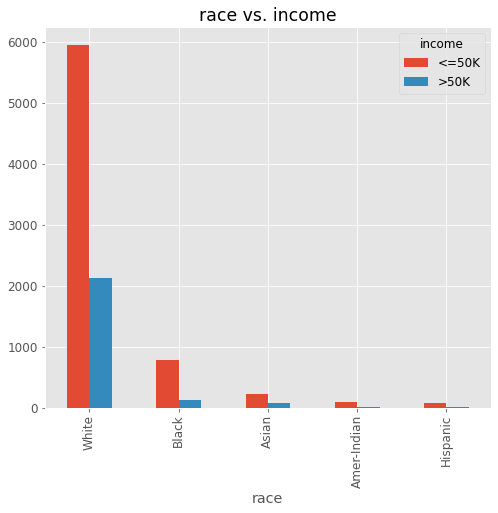

In [34]:
plt.rcParams.update({'font.size': 12}) # set the font size, this must be set at the top.
plt.show(ct_RIs.plot(kind = 'bar', figsize = (8, 7), title = 'race vs. income'))

## Determining the low income groups

In [35]:
# subselection to filter out the high income groups
mask_lowIncome = df['income'] == '<=50K'
lowIncome_df = df[mask_lowIncome]
lowIncome_df.head(20)                 # top 20 records of our filtered data set

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39,Public,13,Single,White,Male,40,<=50K
1,50,Self-emp,13,Married,White,Male,13,<=50K
2,38,Private,9,Single,White,Male,40,<=50K
3,53,Private,7,Married,Black,Male,40,<=50K
4,28,Private,13,Married,Black,Female,40,<=50K
5,37,Private,14,Married,White,Female,40,<=50K
6,49,Private,5,Married,Black,Female,16,<=50K
12,23,Private,13,Single,White,Female,30,<=50K
13,32,Private,12,Single,Black,Male,50,<=50K
15,34,Private,4,Married,Amer-Indian,Male,45,<=50K


In [36]:
# create cross tab 
ctI_df = pd.crosstab(lowIncome_df['race'], df['income'])
#type(ctI_df)
print(ctI_df.columns)
ctI_dfSorted = ctI_df.sort_values('<=50K', ascending=False)
ctI_dfSorted

Index(['<=50K'], dtype='object', name='income')


income,<=50K
race,
White,5944
Black,773
Asian,224
Amer-Indian,83
Hispanic,69


In [37]:
# derive the percentages of each race category 
ctI_dfSorted['percent_race'] = ctI_dfSorted['<=50K'] / ctI_dfSorted['<=50K'].sum()
ctI_dfSorted

income,<=50K,percent_race
race,,
White,5944,0.838009
Black,773,0.108981
Asian,224,0.031580
Amer-Indian,83,0.011702
Hispanic,69,0.009728


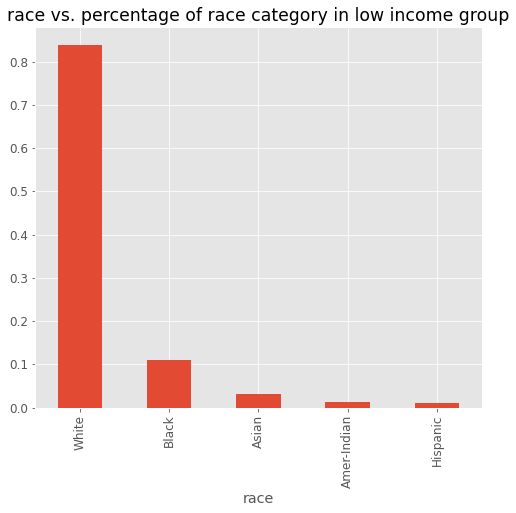

In [38]:
plt.rcParams.update({'font.size': 12}) # set the font size, this must be set at the top.
plt.show(ctI_dfSorted['percent_race'].plot(kind = 'bar', figsize = (8, 7), title = 'race vs. percentage of race category in low income group'))

## Determining the High Income groups

In [39]:
# subselection to filter out the low income groups
mask_HighIncome = df['income'] == '>50K'
highIncome_df = df[mask_HighIncome]
highIncome_df.head(20)                 # top 20 records of our filtered data set 

,age,workclass,education,marital-status,race,sex,hours-per-week,income
7,52,Self-emp,9,Married,White,Male,45,>50K
8,31,Private,14,Single,White,Female,50,>50K
9,42,Private,13,Married,White,Male,40,>50K
10,37,Private,10,Married,Black,Male,80,>50K
11,30,Public,13,Married,Asian,Male,40,>50K
14,40,Private,11,Married,Asian,Male,40,>50K
19,38,Self-emp,14,Single,White,Female,45,>50K
20,40,Private,16,Married,White,Male,60,>50K
25,56,Public,13,Married,White,Male,40,>50K
37,31,Private,10,Married,White,Male,38,>50K


<p><strong>Comparing and Constrasting the characteristics of low-income and high-income categories across the different attributes.</strong></p>

In [40]:
# using the low income group
lowIncome_df.describe(include='all')

,age,workclass,education,marital-status,race,sex,hours-per-week,income
count,7093.000000,7093,7093.000000,7093,7093,7093,7093.000000,7093
unique,NaN,3,NaN,2,5,2,NaN,1
top,NaN,Private,NaN,Single,White,Male,NaN,<=50K
freq,NaN,5443,NaN,4363,5944,4424,NaN,7093
mean,36.635979,NaN,9.646976,NaN,NaN,NaN,39.567038,NaN
std,13.339117,NaN,2.397358,NaN,NaN,NaN,11.868506,NaN
min,17.000000,NaN,1.000000,NaN,NaN,NaN,1.000000,NaN
25%,26.000000,NaN,9.000000,NaN,NaN,NaN,38.000000,NaN
50%,35.000000,NaN,9.000000,NaN,NaN,NaN,40.000000,NaN
75%,45.000000,NaN,10.000000,NaN,NaN,NaN,40.000000,NaN


In [41]:
# aggregate the low income group data set by workclass
print('low Income group - Average means of the different numeric attributes grouped by workclass')
lowIncome_df.groupby(['workclass']).mean()

low Income group - Average means of the different numeric attributes grouped by workclass


,age,education,hours-per-week
workclass,,,
Private,35.196215,9.472717,39.004409
Public,39.391351,10.579459,39.148108
Self-emp,43.929655,9.765517,44.325517


In [42]:
# aggregate the high income group data set by workclass
print('high Income group - Average means of the different numeric attributes grouped by workclass')
highIncome_df.groupby(['workclass']).mean()

high Income group - Average means of the different numeric attributes grouped by workclass


,age,education,hours-per-week
workclass,,,
Private,42.558511,11.402926,45.396277
Public,44.581633,12.323980,43.520408
Self-emp,46.515366,11.565012,48.846336


<p>Comparing the two data sets, low income and high-income groups, high income group has the highest average age, average education, average hours-per-week amongst the private, public and self-emp work classes.</p>
<p>We also learn that the populations in the high-income group works more hours per week compared to the low-income group. </p>

In [43]:
print('low Income group - the mins of the different numeric attributes grouped by workclass')
lowIncome_df.groupby(['workclass']).min()

low Income group - the mins of the different numeric attributes grouped by workclass


,age,education,marital-status,race,sex,hours-per-week,income
workclass,,,,,,,
Private,17,1,Married,Amer-Indian,Female,2,<=50K
Public,17,1,Married,Amer-Indian,Female,5,<=50K
Self-emp,17,2,Married,Amer-Indian,Female,1,<=50K


In [44]:
print('high Income group - the mins of the different numeric attributes grouped by workclass')
highIncome_df.groupby(['workclass']).min()

high Income group - the mins of the different numeric attributes grouped by workclass


,age,education,marital-status,race,sex,hours-per-week,income
workclass,,,,,,,
Private,19,2,Married,Amer-Indian,Female,5,>50K
Public,22,4,Married,Amer-Indian,Female,1,>50K
Self-emp,22,3,Married,Amer-Indian,Female,5,>50K


<p>Comparing the two data sets, low income and high-income groups, high income group has the highest average age, average education, average hours-per-week amongst the private, public, and self-emp work classes. </p>
<p>We also learn that the populations in the high-income group works more hours per week compared to the low-income group</p>
<p>Additionally, the minimum values of the numeric attributes from the two income-groups grouped by work class, show us some interesting results. Amer – Indian race occurs in both groups.</p>
<p>In the low-income group 17 years of age  is the minimum age across the different work classes whereas in the high-income group the minimum ages per the different work classes:  private, public and Self-emp is 19, 22 and 22 respectively.</p>

In [45]:
print('low Income group - the maximum values of the different numeric attributes grouped by workclass')
lowIncome_df.groupby(['workclass']).max()

low Income group - the maximum values of the different numeric attributes grouped by workclass


,age,education,marital-status,race,sex,hours-per-week,income
workclass,,,,,,,
Private,90,16,Single,White,Male,99,<=50K
Public,84,16,Single,White,Male,80,<=50K
Self-emp,90,16,Single,White,Male,99,<=50K


In [46]:
print('high Income group - the maximum values of the different numeric attributes grouped by workclass')
highIncome_df.groupby(['workclass']).max()

high Income group - the maximum values of the different numeric attributes grouped by workclass


,age,education,marital-status,race,sex,hours-per-week,income
workclass,,,,,,,
Private,90,16,Single,White,Male,99,>50K
Public,90,16,Single,White,Male,97,>50K
Self-emp,78,16,Single,White,Male,99,>50K


<p>The maximum age in both the low-income and high-income groups is 90 when group by private workclass. Both groups have a maximum education of 16, which corresponds to 12th grade.</p>
<p>So, this tells us that 12th grade is highest level of education for both low-income and high-income groups and they are all male, single and white who work long hours per week.</p>

In [47]:
print('looking at how age, education, and hours-per-week vary with the low-income group work class values')
lowIncome_df.groupby(['workclass']).describe().T

looking at how age, education, and hours-per-week vary with the low-income group work class values


workclass                 Private      Public    Self-emp
age            count  5443.000000  925.000000  725.000000
               mean     35.196215   39.391351   43.929655
               std      12.978826   12.616399   13.967178
               min      17.000000   17.000000   17.000000
               25%      25.000000   30.000000   34.000000
               50%      33.000000   38.000000   42.000000
               75%      43.000000   47.000000   53.000000
               max      90.000000   84.000000   90.000000
education      count  5443.000000  925.000000  725.000000
               mean      9.472717   10.579459    9.765517
               std       2.351612    2.373056    2.488131
               min       1.000000    1.000000    2.000000
               25%       9.000000    9.000000    9.000000
               50%       9.000000   10.000000   10.000000
               75%      10.000000   13.000000   11.000000
               max      16.000000   16.000000   16.000000
hours-per-week count  5443.000000  925.000000  725.000000
               mean     39.004409   39.148108   44.325517
               std      11.122335   10.414084   16.919830
               min       2.000000    5.000000    1.000000
               25%      38.000000   40.000000   38.000000
               50%      40.000000   40.000000   40.000000
               75%      40.000000   40.000000   52.000000
               max      99.000000   80.000000   99.000000

In [48]:
print('looking at how age, education, and hours-per-week vary with the high-income group work class values')
highIncome_df.groupby(['workclass']).describe().T

looking at how age, education, and hours-per-week vary with the high-income group work class values


workclass                 Private      Public    Self-emp
age            count  1504.000000  392.000000  423.000000
               mean     42.558511   44.581633   46.515366
               std       9.937156    9.027577   10.679480
               min      19.000000   22.000000   22.000000
               25%      35.000000   38.000000   38.000000
               50%      41.000000   44.000000   46.000000
               75%      49.000000   50.000000   54.000000
               max      90.000000   90.000000   78.000000
education      count  1504.000000  392.000000  423.000000
               mean     11.402926   12.323980   11.565012
               std       2.329742    2.259311    2.690144
               min       2.000000    4.000000    3.000000
               25%       9.000000   10.000000    9.000000
               50%      12.000000   13.000000   13.000000
               75%      13.000000   14.000000   14.000000
               max      16.000000   16.000000   16.000000
hours-per-week count  1504.000000  392.000000  423.000000
               mean     45.396277   43.520408   48.846336
               std       9.843885    9.073138   13.795821
               min       5.000000    1.000000    5.000000
               25%      40.000000   40.000000   40.000000
               50%      40.000000   40.000000   50.000000
               75%      50.000000   50.000000   60.000000
               max      99.000000   97.000000   99.000000

<p>Looking at the age attribute and comparing it with the low-income group, high-income group have a higher median age across the different work class attribute values.</p>
<p>Also,  across the different work class attribute values, the high income group has a median education of 12 (Assoc-voc) and 13 (education), whereas the low income group has a median education of 9 (some-college) and 10 (Assoc-acdm). <strong>This arises a question that if one is to make more money, does one need to have either some vocation skills or high education? </strong></p>

In [49]:
print('looking at how age, education, and hours-per-week vary with gender in the high-income group')
highIncome_df.groupby(['sex']).describe().T

looking at how age, education, and hours-per-week vary with gender in the high-income group


sex                       Female         Male
age            count  360.000000  1959.000000
               mean    42.316667    43.862175
               std      9.894415    10.059648
               min     21.000000    19.000000
               25%     35.000000    37.000000
               50%     42.000000    43.000000
               75%     49.000000    50.000000
               max     74.000000    90.000000
education      count  360.000000  1959.000000
               mean    11.783333    11.552323
               std      2.233638     2.440757
               min      3.000000     2.000000
               25%     10.000000     9.000000
               50%     13.000000    12.000000
               75%     13.000000    13.000000
               max     16.000000    16.000000
hours-per-week count  360.000000  1959.000000
               mean    40.591667    46.648800
               std     10.075063    10.521110
               min      5.000000     1.000000
               25%     40.000000    40.000000
               50%     40.000000    45.000000
               75%     45.000000    50.000000
               max     70.000000    99.000000

In [50]:
print('looking at how age, education, and hours-per-week vary with gender in the low-income group')
lowIncome_df.groupby(['sex']).describe().T

looking at how age, education, and hours-per-week vary with gender in the low-income group


sex                        Female         Male
age            count  2669.000000  4424.000000
               mean     36.289996    36.844711
               std      13.595538    13.179163
               min      17.000000    17.000000
               25%      25.000000    26.000000
               50%      34.000000    35.000000
               75%      45.000000    45.000000
               max      90.000000    90.000000
education      count  2669.000000  4424.000000
               mean      9.867366     9.514014
               std       2.215443     2.491547
               min       1.000000     1.000000
               25%       9.000000     9.000000
               50%      10.000000     9.000000
               75%      11.000000    10.000000
               max      16.000000    16.000000
hours-per-week count  2669.000000  4424.000000
               mean     36.807793    41.231691
               std      11.141021    11.984347
               min       2.000000     1.000000
               25%      32.000000    40.000000
               50%      40.000000    40.000000
               75%      40.000000    45.000000
               max      99.000000    99.000000

</p>Furthermore, looking at how age, education and hours-per-week vary with gender in both the  high-income and low-income groups respectively above:</p>
<ul>
<li>We learn that amongst the workforce population, there are more males than females in both the low-income and high-income groups.</li>
<li>The minimum age for females is 21 and that of males is 19 in the high-income group whereas the minimum age for females is 25 and that of males is 26 in the low-income groups. This means that males enter the work force before they are 21 years of age in the high-income group.</li>
<li>The maximum age for females is 74 and that of males is 90 years in the high-income group whereas in the low-income group, it is 90 years of age for both females and males, which raises the need to investigate some of these values because our data set might be having noisy data.  </li>
</ul>

<p>The distribution of education, age and hours-per-week grouped by both high-income and low-income groups shows us the potential outliers in our data set as shown below:</p>

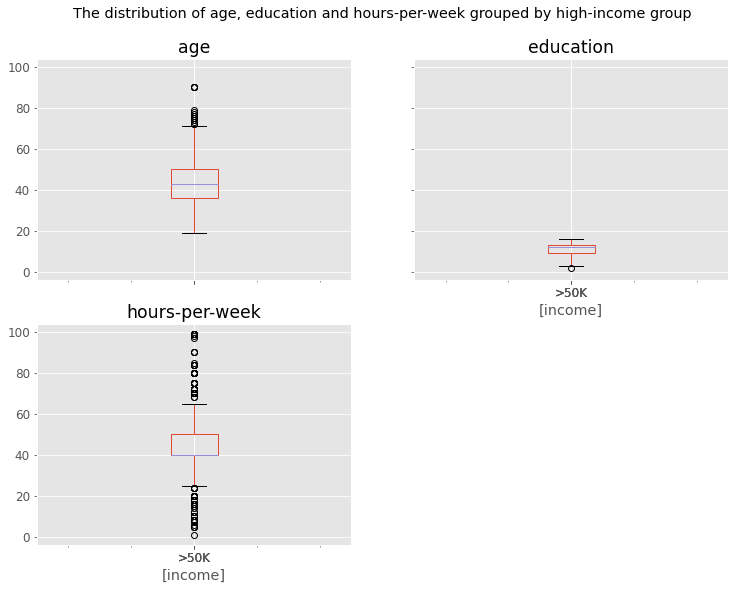

In [51]:
highIncome_df.boxplot(by="income", figsize=(12, 9));
# get rid of the automatic 'Boxplot grouped by group_by_column_name' title
plt.suptitle('The distribution of age, education and hours-per-week grouped by high-income group')

plt.show()

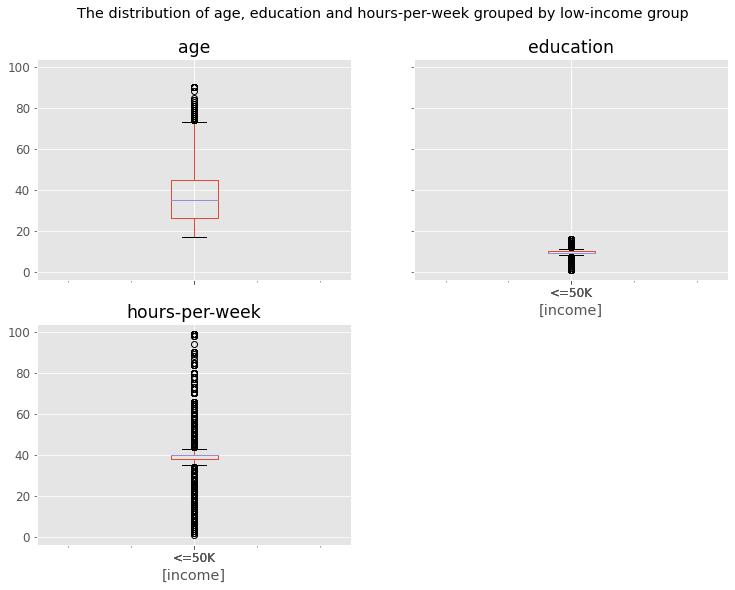

In [52]:
lowIncome_df.boxplot(by="income", figsize=(12, 9));
plt.suptitle('The distribution of age, education and hours-per-week grouped by low-income group');

</p>Both boxplots for age, education and hours-per-week from the low-income and high-income groups shows us the potential of outliers which need to be investigated and understand why they exist before they are removed.</p

### Converting the data into Standard spreadsheet format by creating dummy variables

In [53]:
# make a copy of the data set
adult_modified_df = df.copy()
# wc maps to workclass in the prefix
# ms maps to marital status in the prefix
# r maps to race. 
# s maps to sex
# sal maps to income
workclass_bin = pd.get_dummies(df['workclass'], prefix='wc')
workclass_bin.head(10)


,wc_Private,wc_Public,wc_Self-emp
0,0,1,0
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0
6,1,0,0
7,0,0,1
8,1,0,0
9,1,0,0


In [54]:
# concatenate adult_modified_df with the workclass_bin 
adult_cleansed_v1 = pd.concat([adult_modified_df, workclass_bin], axis=1)
adult_cleansed_v1.head(10)

,age,workclass,education,marital-status,race,sex,hours-per-week,income,wc_Private,wc_Public,wc_Self-emp
0,39,Public,13,Single,White,Male,40,<=50K,0,1,0
1,50,Self-emp,13,Married,White,Male,13,<=50K,0,0,1
2,38,Private,9,Single,White,Male,40,<=50K,1,0,0
3,53,Private,7,Married,Black,Male,40,<=50K,1,0,0
4,28,Private,13,Married,Black,Female,40,<=50K,1,0,0
5,37,Private,14,Married,White,Female,40,<=50K,1,0,0
6,49,Private,5,Married,Black,Female,16,<=50K,1,0,0
7,52,Self-emp,9,Married,White,Male,45,>50K,0,0,1
8,31,Private,14,Single,White,Female,50,>50K,1,0,0
9,42,Private,13,Married,White,Male,40,>50K,1,0,0


In [55]:
# ms maps to marital status in the prefix
marital_status_bin = pd.get_dummies(df['marital-status'], prefix='ms')
marital_status_bin.head(10)

,ms_Married,ms_Single
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,0,1
9,1,0


In [56]:
# concatenate adult_cleansed_v1 data set with the marital_status_bin
adult_cleansed_v2 = pd.concat([adult_cleansed_v1, marital_status_bin], axis=1)
adult_cleansed_v2.head(10)

,age,workclass,education,marital-status,race,sex,hours-per-week,income,wc_Private,wc_Public,wc_Self-emp,ms_Married,ms_Single
0,39,Public,13,Single,White,Male,40,<=50K,0,1,0,0,1
1,50,Self-emp,13,Married,White,Male,13,<=50K,0,0,1,1,0
2,38,Private,9,Single,White,Male,40,<=50K,1,0,0,0,1
3,53,Private,7,Married,Black,Male,40,<=50K,1,0,0,1,0
4,28,Private,13,Married,Black,Female,40,<=50K,1,0,0,1,0
5,37,Private,14,Married,White,Female,40,<=50K,1,0,0,1,0
6,49,Private,5,Married,Black,Female,16,<=50K,1,0,0,1,0
7,52,Self-emp,9,Married,White,Male,45,>50K,0,0,1,1,0
8,31,Private,14,Single,White,Female,50,>50K,1,0,0,0,1
9,42,Private,13,Married,White,Male,40,>50K,1,0,0,1,0


In [57]:
# r maps to race in the prefix
race_bin = pd.get_dummies(df['race'], prefix='r')
race_bin.head(10)

,r_Amer-Indian,r_Asian,r_Black,r_Hispanic,r_White
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,1,0,0
4,0,0,1,0,0
5,0,0,0,0,1
6,0,0,1,0,0
7,0,0,0,0,1
8,0,0,0,0,1
9,0,0,0,0,1


In [58]:
# concatenate adult_cleansed_v2 data set with the race_bin
adult_cleansed_v3 = pd.concat([adult_cleansed_v2, race_bin], axis=1)
adult_cleansed_v3.head(10)

,age,workclass,education,marital-status,race,sex,hours-per-week,income,wc_Private,wc_Public,wc_Self-emp,ms_Married,ms_Single,r_Amer-Indian,r_Asian,r_Black,r_Hispanic,r_White
0,39,Public,13,Single,White,Male,40,<=50K,0,1,0,0,1,0,0,0,0,1
1,50,Self-emp,13,Married,White,Male,13,<=50K,0,0,1,1,0,0,0,0,0,1
2,38,Private,9,Single,White,Male,40,<=50K,1,0,0,0,1,0,0,0,0,1
3,53,Private,7,Married,Black,Male,40,<=50K,1,0,0,1,0,0,0,1,0,0
4,28,Private,13,Married,Black,Female,40,<=50K,1,0,0,1,0,0,0,1,0,0
5,37,Private,14,Married,White,Female,40,<=50K,1,0,0,1,0,0,0,0,0,1
6,49,Private,5,Married,Black,Female,16,<=50K,1,0,0,1,0,0,0,1,0,0
7,52,Self-emp,9,Married,White,Male,45,>50K,0,0,1,1,0,0,0,0,0,1
8,31,Private,14,Single,White,Female,50,>50K,1,0,0,0,1,0,0,0,0,1
9,42,Private,13,Married,White,Male,40,>50K,1,0,0,1,0,0,0,0,0,1


In [59]:
# s maps to sex in the prefix
sex_bin = pd.get_dummies(df['sex'], prefix='s')
sex_bin.head(10)

,s_Female,s_Male
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0
5,1,0
6,1,0
7,0,1
8,1,0
9,0,1


In [60]:
# concatenate adult_cleansed_v3 data set with the sex_bin
adult_cleansed_v4 = pd.concat([adult_cleansed_v3, sex_bin], axis=1)
adult_cleansed_v4.head(10)

,age,workclass,education,marital-status,race,sex,hours-per-week,income,wc_Private,wc_Public,wc_Self-emp,ms_Married,ms_Single,r_Amer-Indian,r_Asian,r_Black,r_Hispanic,r_White,s_Female,s_Male
0,39,Public,13,Single,White,Male,40,<=50K,0,1,0,0,1,0,0,0,0,1,0,1
1,50,Self-emp,13,Married,White,Male,13,<=50K,0,0,1,1,0,0,0,0,0,1,0,1
2,38,Private,9,Single,White,Male,40,<=50K,1,0,0,0,1,0,0,0,0,1,0,1
3,53,Private,7,Married,Black,Male,40,<=50K,1,0,0,1,0,0,0,1,0,0,0,1
4,28,Private,13,Married,Black,Female,40,<=50K,1,0,0,1,0,0,0,1,0,0,1,0
5,37,Private,14,Married,White,Female,40,<=50K,1,0,0,1,0,0,0,0,0,1,1,0
6,49,Private,5,Married,Black,Female,16,<=50K,1,0,0,1,0,0,0,1,0,0,1,0
7,52,Self-emp,9,Married,White,Male,45,>50K,0,0,1,1,0,0,0,0,0,1,0,1
8,31,Private,14,Single,White,Female,50,>50K,1,0,0,0,1,0,0,0,0,1,1,0
9,42,Private,13,Married,White,Male,40,>50K,1,0,0,1,0,0,0,0,0,1,0,1


In [61]:
# sal maps to income in the prefix
income_bin = pd.get_dummies(df['income'], prefix='sal')
income_bin.head(10)

,sal_<=50K,sal_>50K
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,0,1
8,0,1
9,0,1


In [62]:
# concatenate adult_cleansed_v4 data set with the income_bin
adult_cleansed_v5 = pd.concat([adult_cleansed_v4, income_bin], axis=1)
adult_cleansed_v5.head(10)

,age,workclass,education,marital-status,race,sex,hours-per-week,income,wc_Private,wc_Public,...,ms_Single,r_Amer-Indian,r_Asian,r_Black,r_Hispanic,r_White,s_Female,s_Male,sal_<=50K,sal_>50K
0,39,Public,13,Single,White,Male,40,<=50K,0,1,...,1,0,0,0,0,1,0,1,1,0
1,50,Self-emp,13,Married,White,Male,13,<=50K,0,0,...,0,0,0,0,0,1,0,1,1,0
2,38,Private,9,Single,White,Male,40,<=50K,1,0,...,1,0,0,0,0,1,0,1,1,0
3,53,Private,7,Married,Black,Male,40,<=50K,1,0,...,0,0,0,1,0,0,0,1,1,0
4,28,Private,13,Married,Black,Female,40,<=50K,1,0,...,0,0,0,1,0,0,1,0,1,0
5,37,Private,14,Married,White,Female,40,<=50K,1,0,...,0,0,0,0,0,1,1,0,1,0
6,49,Private,5,Married,Black,Female,16,<=50K,1,0,...,0,0,0,1,0,0,1,0,1,0
7,52,Self-emp,9,Married,White,Male,45,>50K,0,0,...,0,0,0,0,0,1,0,1,0,1
8,31,Private,14,Single,White,Female,50,>50K,1,0,...,1,0,0,0,0,1,1,0,0,1
9,42,Private,13,Married,White,Male,40,>50K,1,0,...,0,0,0,0,0,1,0,1,0,1


In [63]:
# lets cleanup data set and drop the unwanted columns
# get the column names
columnsToDrop = ['workclass', 'marital-status', 'race', 'sex', 'income']
dfColumns = adult_cleansed_v5.columns
colCnt = 0
for col in dfColumns:
    if col in columnsToDrop:
        # we need to use inplace=True so that we can operate on the same copy and returns None
        adult_cleansed_v5.drop(columns=[col], inplace = True) 

        print('dropped %s column from the adult_cleansed_v5 data set' %(col))
        colCnt += 1
    if colCnt == 5:
        adult_ssf_df = adult_cleansed_v5

dropped workclass column from the adult_cleansed_v5 data set
dropped marital-status column from the adult_cleansed_v5 data set
dropped race column from the adult_cleansed_v5 data set
dropped sex column from the adult_cleansed_v5 data set
dropped income column from the adult_cleansed_v5 data set


In [64]:
adult_ssf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9412 entries, 0 to 9411
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             9412 non-null   int64
 1   education       9412 non-null   int64
 2   hours-per-week  9412 non-null   int64
 3   wc_Private      9412 non-null   uint8
 4   wc_Public       9412 non-null   uint8
 5   wc_Self-emp     9412 non-null   uint8
 6   ms_Married      9412 non-null   uint8
 7   ms_Single       9412 non-null   uint8
 8   r_Amer-Indian   9412 non-null   uint8
 9   r_Asian         9412 non-null   uint8
 10  r_Black         9412 non-null   uint8
 11  r_Hispanic      9412 non-null   uint8
 12  r_White         9412 non-null   uint8
 13  s_Female        9412 non-null   uint8
 14  s_Male          9412 non-null   uint8
 15  sal_<=50K       9412 non-null   uint8
 16  sal_>50K        9412 non-null   uint8
dtypes: int64(3), uint8(14)
memory usage: 349.4 KB


<p><strong>Below is the meta data of our new panda data frame, which represents a data matrix. </srong></p>

In [65]:
# Displaying the top 10 records of the data set
print('The top 10 records of the data matrix data frame')
adult_ssf_df.head(10)


The top 10 records of the data matrix data frame


,age,education,hours-per-week,wc_Private,wc_Public,wc_Self-emp,ms_Married,ms_Single,r_Amer-Indian,r_Asian,r_Black,r_Hispanic,r_White,s_Female,s_Male,sal_<=50K,sal_>50K
0,39,13,40,0,1,0,0,1,0,0,0,0,1,0,1,1,0
1,50,13,13,0,0,1,1,0,0,0,0,0,1,0,1,1,0
2,38,9,40,1,0,0,0,1,0,0,0,0,1,0,1,1,0
3,53,7,40,1,0,0,1,0,0,0,1,0,0,0,1,1,0
4,28,13,40,1,0,0,1,0,0,0,1,0,0,1,0,1,0
5,37,14,40,1,0,0,1,0,0,0,0,0,1,1,0,1,0
6,49,5,16,1,0,0,1,0,0,0,1,0,0,1,0,1,0
7,52,9,45,0,0,1,1,0,0,0,0,0,1,0,1,0,1
8,31,14,50,1,0,0,0,1,0,0,0,0,1,1,0,0,1
9,42,13,40,1,0,0,1,0,0,0,0,0,1,0,1,0,1


<p>The above data display shows the top 10 records of the new derived data set after converting the data into a standard spreadsheet format by converting each of the categorical variables into multiple dummy attributes. </p>

In [66]:
# Saving the new table to the adult_numeric.csv file
adult_ssf_df.to_csv('../../data/adult_numeric.csv', index=False)

<strong>Perform a correlation analysis on the variables, now that we have converted all the variables into numeric attributes.</strong>

In [67]:
print('wc maps to workclass')
print('ms maps to marital-status')
print('r maps to race')
print('s maps to sex')
print('sal maps to salary')
corr_matrix = adult_ssf_df.corr().round(decimals=2)
corr_matrix

wc maps to workclass
ms maps to marital-status
r maps to race
s maps to sex
sal maps to salary


,age,education,hours-per-week,wc_Private,wc_Public,wc_Self-emp,ms_Married,ms_Single,r_Amer-Indian,r_Asian,r_Black,r_Hispanic,r_White,s_Female,s_Male,sal_<=50K,sal_>50K
age,1.00,0.03,0.10,-0.20,0.08,0.19,0.38,-0.38,-0.01,-0.01,-0.01,-0.03,0.02,-0.07,0.07,-0.23,0.23
education,0.03,1.00,0.14,-0.15,0.15,0.04,0.05,-0.05,-0.04,0.06,-0.07,-0.04,0.05,-0.01,0.01,-0.33,0.33
hours-per-week,0.10,0.14,1.00,-0.10,-0.02,0.15,0.18,-0.18,0.00,0.00,-0.07,0.01,0.06,-0.22,0.22,-0.22,0.22
wc_Private,-0.20,-0.15,-0.10,1.00,-0.68,-0.63,-0.12,0.12,-0.01,-0.02,0.00,0.02,-0.00,0.07,-0.07,0.12,-0.12
wc_Public,0.08,0.15,-0.02,-0.68,1.00,-0.15,-0.00,0.00,0.02,0.01,0.07,-0.02,-0.07,0.05,-0.05,-0.05,0.05
wc_Self-emp,0.19,0.04,0.15,-0.63,-0.15,1.00,0.17,-0.17,-0.01,0.01,-0.08,-0.01,0.07,-0.15,0.15,-0.11,0.11
ms_Married,0.38,0.05,0.18,-0.12,-0.00,0.17,1.00,-1.00,-0.01,0.02,-0.10,0.00,0.08,-0.36,0.36,-0.41,0.41
ms_Single,-0.38,-0.05,-0.18,0.12,0.00,-0.17,-1.00,1.00,0.01,-0.02,0.10,-0.00,-0.08,0.36,-0.36,0.41,-0.41
r_Amer-Indian,-0.01,-0.04,0.00,-0.01,0.02,-0.01,-0.01,0.01,1.00,-0.02,-0.03,-0.01,-0.24,0.02,-0.02,0.03,-0.03
r_Asian,-0.01,0.06,0.00,-0.02,0.01,0.01,0.02,-0.02,-0.02,1.00,-0.06,-0.02,-0.44,0.00,-0.00,0.01,-0.01


<p>From the above correlation matrix, we discover that there is a correlation in between some of the attributes as explained below:</p>
    <ul>
    <li>age and sal_<=50K have a correlation of -0.23, which is weak negative correlation.</li>
    <li>education   and  sal_<=50K have a correlation of  -0.33, which is a weak negative correlation.</li>
    <li>age and sal_>50K have a correlation of 0.23 which is weak between the two attributes. </li>
    <li>education and sal_>50K have a correlation of 0.33 which is weak correlation between the two attributes </li>
    <li>workclass public (wc_public) and workclass_private (wc_Private) have a correlation of -0.68 implying that there is a strong negative relationship between the two attributes meaning that an increase in wc_public will lead to an increase in wc_private but in the opposite direction and vice versa. These two variables need to be investigated more so that either one would be removed because living both of them in the data set will cause multicollinearity. We need to look at the Variance Inflation factor of these two attributes where any values greater than five or greater than 10 will be worrisome. Any values less than five, need not to worry about about them.</li>
    <li>workclass self-emp (wc_self-emp) and workclass_private (wc_private) have a correlation of -0.63, which means that there is a moderate negative relationship between the two attributes  and this raises more investigation if any one of them can be removed from the data set. Otherwise leaving both in the data set will cause multicollinearity.</li>
    <li>ms_Married and age have a correlation of 0.38, which is a weak correlation between the two attributes.</li>
    <li>ms_single and age have a correlation of -0.38, which is a negative weak correlation between the two attributes</li>
    <li>r_black and r_white have a correlation of -0.79 meaning that there is a strong negative relationship between r_black (race_black) and r_white(race_white); an increase in r_black will lead to an increase in r_white but in the opposite direction and vice versa, an increase in r_white will lead to an increase in r_black , but in the opposite direction. So, it is not appropriate to have both of these pairs when you are running any machine learning algorithms.</li>
    </ul>


In [68]:
corr_matrix['education'].sort_values(ascending=False)

education         1.00
sal_>50K          0.33
wc_Public         0.15
hours-per-week    0.14
r_Asian           0.06
r_White           0.05
ms_Married        0.05
wc_Self-emp       0.04
age               0.03
s_Male            0.01
s_Female         -0.01
r_Hispanic       -0.04
r_Amer-Indian    -0.04
ms_Single        -0.05
r_Black          -0.07
wc_Private       -0.15
sal_<=50K        -0.33
Name: education, dtype: float64

<p>We notice that there is a <strong>weak </strong> correlation between education and sal_>50K with a correlation value of 0.33.</p> 
<p>There is also a negative <strong>weak </strong> correlation between  education and sal_<=50K. </p>
<p>The rest of the attributes are not correlated to education. </p>

In [69]:
corr_matrix['sal_<=50K'].sort_values(ascending=False)

sal_<=50K         1.00
ms_Single         0.41
s_Female          0.20
wc_Private        0.12
r_Black           0.08
r_Amer-Indian     0.03
r_Hispanic        0.03
r_Asian           0.01
wc_Public        -0.05
r_White          -0.09
wc_Self-emp      -0.11
s_Male           -0.20
hours-per-week   -0.22
age              -0.23
education        -0.33
ms_Married       -0.41
sal_>50K         -1.00
Name: sal_<=50K, dtype: float64

<p>Also, from the above correlation display with <strong>sal_<=50K</strong>, we notice that there is a weak correlation between it (sal_<=50K) and ms_single with a value of 0.41.</p>
<p>A <strong>weak</strong> negative correlation exists between sal_<=50K and ms_Married with a value of -0.41. </p>
<p>The rest of the attributes are not correlated with sal_<=50K. </p>

In [70]:
# create a new data set with age column only
#adult_age_df = pd.DataFrame(adult_ssf_df['age'], columns=['age'])
adult_age_df = adult_ssf_df[['age']].copy()
#adult_age_df['ID'] = adult_age_df.index + 1
#adult_age_df.set_index('ID')


In [71]:
# Bin the age variable 
# we specify what we mean by young, mid-age and old. 
adult_age_df['age_bin'] = pd.qcut(adult_age_df.age,  q = 3, labels = ['young', 'mid-age', 'old'])
#age_bin = pd.qcut(adult_age_df.age,  [17, 35, 55, 99], labels = ['young', 'mid-age', 'old']) # this errors out.
adult_age_df.head(1000)


,age,age_bin
0,39,mid-age
1,50,old
2,38,mid-age
3,53,old
4,28,young
...,...,...
995,54,old
996,34,mid-age
997,49,old
998,38,mid-age


  age_categories  numberOfPeople
0          young            3225
1        mid-age            3100
2            old            3087


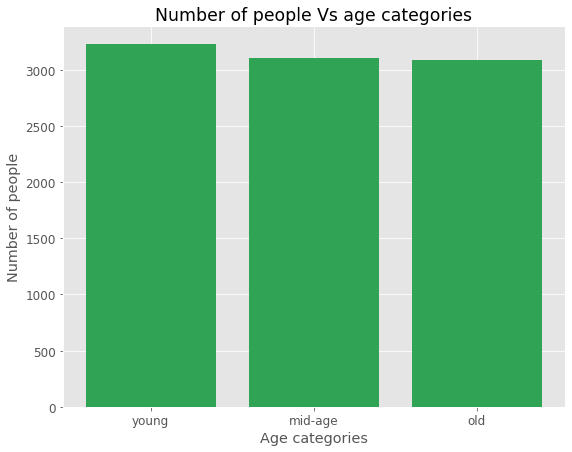

In [72]:
plt.rcParams.update({'font.size': 12}) # set the font size, this must be set at the top.
#print(adult_age_df.groupby(['age_bin'])['age_bin'].count())
age_bin_cnts = adult_age_df.groupby(['age_bin'])['age_bin'].count()

# rename the index
age_bin_cnts = age_bin_cnts.rename_axis('age_categories') 
age_bin_cnts

# convert the series into a data frame
age_bin_cnts_df = age_bin_cnts.to_frame().reset_index()

# rename the age_bin column to the number of people
age_bin_cnts_df = age_bin_cnts_df.rename(columns = {'age_categories': 'age_categories', 'age_bin': 'numberOfPeople'})
print(age_bin_cnts_df)

fig = plt.figure(figsize=(9, 7)) # set the size of the container
plt.bar(age_bin_cnts_df['age_categories'], age_bin_cnts_df['numberOfPeople'], color = '#31a354')
plt.xlabel('Age categories')
plt.ylabel('Number of people')
plt.title('Number of people Vs age categories')
plt.show()

<p>The visualized bar chat above shows the number of people per age category, which explains that we have more young people in our data set than both the mid-age and the old age categories.</p>

In [73]:
# I am wonder why I am getting an error here
QAadult_age_df = adult_ssf_df[['age']].copy()
QAadult_age_df['age_bin'] = pd.qcut(QAadult_age_df.age,  [17, 35, 55, 99], labels = ['young', 'mid-age', 'old']) # this errors out.
QAadult_age_df

IndexError: index 159987 is out of bounds for axis 0 with size 9412